# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/human_body_temperature.csv')
pop_mean = 98.6 

## Is the distribution of body temperatures normal?

In [3]:
# Examine head of dataframe
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


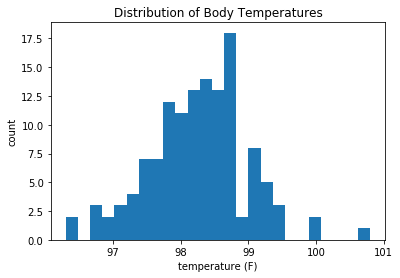

In [6]:
# Use a histogram to visualize the data distribution
_ = plt.hist(df['temperature'], bins=25)
_ = plt.xlabel('temperature (F)')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Body Temperatures')
plt.show()

The distribution of the body temperatures does not appear to be normally distributed. Next, compare to Normal PDF and normal curve using ECDF and KDE Plots.

### Compare to a Normal PDF and Normal Curve

In [7]:
# Function to calculate ECDF
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    # np.arange(1, len(x)+1) / len(x)
    y = np.arange(1, n+1) / n

    return x, y

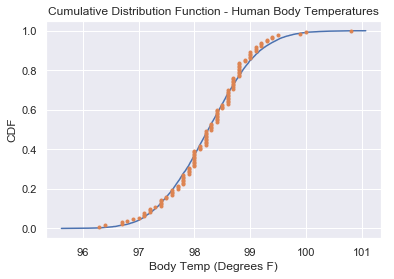

In [8]:
# Create a one-dimensional NumPy array of temperatures
bodytemp = df['temperature']

mean = np.mean(bodytemp)
std = np.std(bodytemp)
samples = np.random.normal(mean, std, size=10000)
x, y = ecdf(bodytemp) #ecdf function
x_theor, y_theor = ecdf(samples) 

# Plot both distributions
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.title('Cumulative Distribution Function - Human Body Temperatures')
_ = plt.xlabel('Body Temp (Degrees F)')
_ = plt.ylabel('CDF')
margins = 0.02

plt.show()

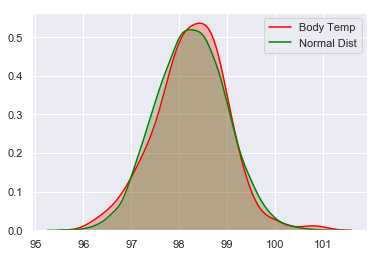

In [9]:
# Use sns.kdeplot to compare the curves
sns.kdeplot(bodytemp, color='red', label='Body Temp', shade=True)
sns.kdeplot(x_theor, color='green', label='Normal Dist', shade=True)
plt.legend()
plt.show()

Using the computed mean and std dev to check against the theoretical distribution using both the ECDF and the normal distribution curve tell us that the distribution of the the body temperatures is indeed normal (although there may be some question as to whether the tail is "light tailed").  The histogram also shows that the sample's distribution is unimodal and essentially symmetrical around the mean. 

## Is the sample size large? Are the observations independent?
At a sample size of 130, the sample is large, as many references to the CLT list n=30 as "sufficiently large".

The observations are independent, as one sample has no effect on the the other.

In [12]:
# Get descriptive statistics about the dataframe
desc = df.describe()
type(desc)
samp_cnt = int(desc['temperature'][0])
samp_mean = desc['temperature'][1]
samp_std = desc['temperature'][2]
pop_mean = 98.6
print('sample population = ', int(samp_cnt))
print('sample mean = ', samp_mean)
print('sample std dev = ', samp_std)

sample population =  130
sample mean =  98.24923076923078
sample std dev =  0.7331831580389454


## Is the true population mean really 98.6 degrees F?
### Bootstrap hypothesis test
H0: The mean body temperature in the sample is the true population mean (H0: mean = 98.6).  
H1: The mean body temperature in the sample is not true population mean (H1: mean != 98.6).

In [28]:
# Define Functions
def diff_from_pop_mean(data, pop_mean = 98.6):
    return np.mean(data) - pop_mean

In [20]:
# manual bootstrap hypothesis test with 10,000 samples
bs_replicates = np.empty(10000)

size = len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(bodytemp, len(bodytemp))
    bs_replicates[i] = np.mean(bs_sample)
    
p_value = np.sum(bs_replicates >= 98.6) / size

print('p-value: ',p_value)
print('Mean: ',np.mean(bs_replicates))

p-value:  0.0
Mean:  98.24962723076924


## Bootstrap hypothesis test results
Using 10,000 bootstrap replicates, the bootstrap hypothesis test has a p-value of 0.0, so we can reject the null hypothesis and conclude that the mean body temperature of the sample set is 98.25, which is not the same as the population mean, 98.6.

### Frequentist testing
When conducting frequentist hypothesis testing, we will use a **one-sample hypothesis test**, as we only have one data set, and we're comparing it to a single number (the population mean)

In this situation, it would be appropriate to use a **t-statistic**, as the standard deviation of the population is not known.

### t-test

In [27]:
### Perform a t-test
# H0: There is no difference between the sample mean and the population mean
# H1: There is a difference between the sample mean and the population mean

from scipy import stats

#pop_mean = 98.6

# Conduct a one-sample t-test
result = stats.ttest_1samp(bodytemp, pop_mean)

print("t statistic = ", round(result.statistic,5))
print("p value = ", round(result.pvalue, 3))

t statistic =  -5.45482
p value =  0.0


The p-value is 0.0, so we can reject the null hypothesis and say that there is a difference between the sample mean and the population mean.

### z-test
Now try using the the z-test. How is the result be different? Why?

In [30]:
# Demonstrating significant differences between a
# vector of measurements and a single value
# Using the statsmodels package for doing test
# Using numpy to generate some fake data

from statsmodels.stats import weightstats as stests

# Assuming data are normally distributed, we can do z-test
testResult=stests.ztest(bodytemp,value=pop_mean)
pValue=testResult[1]
zStat=testResult[0] 
print("p-value is: ", round(pValue,4))
print("z-statistic is ", round(zStat, 5))

p-value is:  0.0
z-statistic is  -5.45482


For the z-test, the test statistics are the same, but the p-value (0.000000049021570141012155) is the slightly different than the t-test.  However, when rounded, they are essentially the same - 0.00.

For sample sizes over 30, we will get the same result between the z-test and t-test.

## Repeat z- and t-tests
Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?

In [35]:
# take a random sample of 10 from the bodytemp
#np.random.seed(6)
sample = np.random.choice(a=bodytemp, size=10)

## t-test

In [36]:
### Perform a t-test
# H0: There is no difference between the sample mean and the population mean
# H1: There is a difference between the sample mean and the population mean
#pop_mean = 98.6

# Conduct a one-sample t-test
tStat = stats.ttest_1samp(sample, pop_mean)

print("t statistic = ", round(tStat.statistic,5))
print("p value = ", round(tStat.pvalue, 3))


t statistic =  -1.47965
p value =  0.173


In [39]:
# Perform a z-test
testResult=stests.ztest(sample,value=pop_mean)
zStatistic=testResult[0] 
pVal=testResult[1]
print("p-value is: ", round(pVal,4))
print("z-statistic is ", round(zStatistic, 5))

p-value is:  0.139
z-statistic is  -1.47965


With a sample of 10 and an unknown population standard deviation, the appropriate test to use for a sample this size is a t-test.

However, both tests have the same test statistic (-1.47965), and both have a p-value > .05, so we cannot reject the null hypothesis. These results tell me that there is little difference between the t-test and z-test in conditions such as these.

### Confidence Intervals

**At what temperature should we consider someone's temperature to be "abnormal"?**

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.  

Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

## Frequentist Approach
Calculate the confidence intervals using the frequentist approach.

In [53]:
#Calculate the confidence intervals using the frequentist approach
ci_lo, ci_hi = stats.norm.interval(0.95, loc=samp_mean, scale=samp_std)
print('95% confidence interval: (',round(ci_lo, 3),',',round(ci_hi, 3),')')
print('Margin of error: +/-',round((ci_hi - samp_mean),3))

95% confidence interval: ( 96.812 , 99.686 )
Margin of error: +/- 1.437


## Using Bootstrap Approach
Calculate the confidence intervals using the bootstrap approach

In [49]:
# Calculates p value using 10,000 boostrap replicates
bootstrap_replicates = np.empty(10000)

size = len(bootstrap_replicates)

for i in range(size):
    bootstrap_sample = np.random.choice(bodytemp, size=len(bodytemp))
    bootstrap_replicates[i] = np.mean(bootstrap_sample)

p = np.sum(bootstrap_replicates >= 98.6) / len(bootstrap_replicates)
print('p-value: ', p)

x_bar = np.mean(bootstrap_replicates)
ci = stats.norm.interval(0.95, loc=mean, scale=std)

print('95% confidence interval (',round(ci[0],3), ',', round(ci[1],3), ')')
print('margin of error: +/-',round((ci[1] - mean),5))

p-value:  0.0
95% confidence interval ( 96.818 , 99.681 )
margin of error: +/- 1.43147


## Bootstrap and frequentist confidence intervals
According to both the bootstrap and frequentist approaches, using the mean we calculated (98.249), and at a 95% confidence interval, a temperature below 96.818° or above 99.681° would be considered abnormal.

## Gender Differences
Is there a significant difference between males and females in normal temperature?  

What testing approach did you use and why?  

Write a story with your conclusion in the context of the original problem.

### Hypothesis
H0: There is no difference in the mean temperature of males and females.  
H1: There is a difference in the mean temperature of males and females.

We will compare the means of male and female temperatures to determine if there is a significant difference in the means for each group.

In [86]:
# subset males and females
males = df[df.gender == 'M']
females = df[df.gender == 'F']

male_temp = males.temperature
female_temp = females.temperature
male_temp_mean = np.mean(male_temp)
female_temp_mean = np.mean(female_temp)
male_temp_std = np.std(male_temp)
female_temp_std = np.std(female_temp)

print('In the sample set, there are ', len(males),'and', len(females),' females.')
#print('\n')
print('Male temperature mean', round(male_temp_mean,3))
print('Male temperature standard deviation', round(male_temp_std,3))
print('Female temperature mean', round(female_temp_mean,3))
print('Female temperature standard deviation',round(female_temp_std,3))

In the sample set, there are  65 and 65  females.
Male temperature mean 98.105
Male temperature standard deviation 0.693
Female temperature mean 98.394
Female temperature standard deviation 0.738


### Plot boxplots to visualize male and female temperature distributions

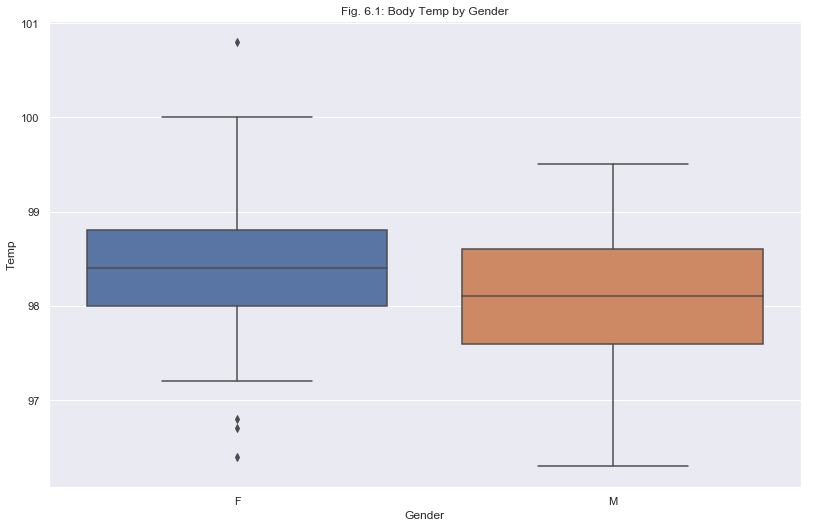

In [59]:
# plot a boxplot for an overview
sns.boxplot(x = 'gender', y = 'temperature', data=df)

sns.set(rc={"figure.figsize": (12, 8)})

_ = plt.xlabel('Gender')
_ = plt.ylabel('Temp')
_ = plt.title('Fig. 6.1: Body Temp by Gender')

plt.show();

In [83]:
# Will use a t-test for two independent samples (scipy.stats.mstats.ttest_ind), but first we must check the variances
# equal_var : bool
# If True, perform a standard independent 2 sample test that assumes equal population variances. If False, perform Welch’s t-test, which does not assume equal population variance.

# Check for identical variances
male_var = np.var(male_temp)
female_var = np.var(female_temp)
print('Male variance = ', male_var)
print('Female variance = ', female_var)
print('Variances are not equal, so the Welch\'s t-test must be used.')

Male variance =  0.4807479289940825
Female variance =  0.5442698224852062
Variances are not equal, so the Welch's t-test must be used.


In [84]:
# As the variances are not equal, the Welch's t-test must be used (per the SciPy documentation)
# Use 'equal_var=False'
welchs_t = stats.ttest_ind(male_temp, female_temp, equal_var=False)
print('t-statistic: ',welchs_t.statistic)
print('p-value: ',welchs_t.pvalue)

t-statistic:  -2.285434538165611
p-value:  0.023938264182934196


In [89]:
# Males confidence interval
#male_temp_mean 
#male_temp_std
male_ci_lo, male_ci_hi = stats.norm.interval(0.95, loc=male_temp_mean, scale=male_temp_std)
print('Male 95% Confidence Interval ( ', male_ci_lo,'-' ,male_ci_hi,')')

# Females confidence interval
female_temp_std
female_temp_mean
female_ci_lo, female_ci_hi = stats.norm.interval(0.95, loc=female_temp_mean, scale=female_temp_std)
print('Female 95% Confidence Interval ( ', female_ci_lo,'-' ,female_ci_hi,')')

Male 95% Confidence Interval (  96.74565498329211 - 99.46357578593869 )
Female 95% Confidence Interval (  96.94788968478372 - 99.83980262290854 )


## Results
A hypothesis test was conducted to determine if there is a significant difference between males and females in normal temperature.
    <blockquote>
    H0: There is no difference in the mean temperature of males and females.  
    H1: There is a difference in the mean temperature of males and females.
    </blockquote>

An initial EDA visualization of boxplots for both the male and female samples indicate that the females' mean temperature is slightly higher than the males'.

A t-test of two independent samples was used to test the hypothesis, but as the variances of each sample were different, the Welch's t-test was required.

Because the p-value for the test statistic was < .05, we must reject the null hyptothesis that there is no difference in the mean temperature of males and females, and accept the alternative hypothesis that there is a difference in the mean temperature of males and females.